In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd '/content/drive/My Drive/IEEE BigMM/IEEE-BigMM'
%ls
%cd 'Code/Sarcasm'

/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM
 Code/   Data/   README.md  'Stats .txt'   temp.txt
/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM/Code/Sarcasm


In [15]:
%ls

AUC_Sarcasm_BiLSTM.ipynb         Bi-LSTM-sarcasm.ipynb
AUC_Sarcasm_BiLSTMv2colab.ipynb  Sarcasm_Bert.ipynb


In [16]:
#Importing the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [17]:
#Preventing any unnecessary verbose from popping up
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [18]:
#Getting the current directory of this iPynb file
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM/Code/Sarcasm'

In [35]:
#loading the dataset, from the json file stored in the given directory below, and visualising it
data=pd.read_csv("../clean_datav3.csv")
# data=pd.read_csv("../final_dataset.csv")
data.head(20)

,Unnamed: 0,Unnamed: 0.1,ID,tweet_id,text,missing_text,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,0,0,0,1.052240e+18,new post domestic violence awareness caught me...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1,1,1.052210e+18,domestic violence awareness caught metoo,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,2,1.052180e+18,mother nature metoo,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,3,1.052160e+18,ption,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,4,4,1.052100e+18,high time metoo named shamed men medium advert...,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,5,5,5,1.052050e+18,idea persistence involves systematically igno...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,6,6,6,1.052010e+18,ption,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
7,7,7,7,1.051990e+18,meredith metoo moment theoffice,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,8,8,1.051980e+18,interesting analysis theeconomist change perce...,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,9,9,9,1.051940e+18,shock hey old bill clear amp every single imwi...,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [39]:
data['text']=data['text'].astype(str)

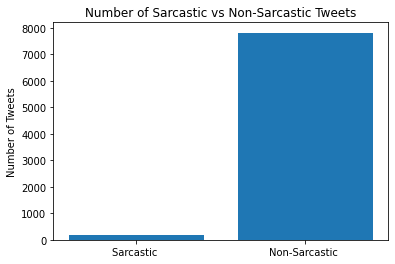

In [40]:
#Visualization
sarcastic=0
for i in range(len(data["Sarcasm"])):
    if data["Sarcasm"].iloc[i]==1:
        sarcastic+=1
normal=len(data["Sarcasm"])-sarcastic
label_values={"Sarcastic " : sarcastic, "Non-Sarcastic " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.title("Number of Sarcastic vs Non-Sarcastic Tweets")
plt.ylabel("Number of Tweets")
plt.show()

In [41]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical


num_words=20000
max_sentence_len=300
tokenizer=Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(data["text"])
X=tokenizer.texts_to_sequences(list(data["text"]))
# X = data['text']
X=pad_sequences(X,maxlen=max_sentence_len)
Y=to_categorical(data["Sarcasm"].values)
print("The number of unique words in the text corpus dictionary : {}".format(len(tokenizer.word_index)))
print("The shape of the trainable data : {}".format(X.shape))
print("The shape of the labels for the data is : {}".format(Y.shape))

The number of unique words in the text corpus dictionary : 16099
The shape of the trainable data : (7978, 300)
The shape of the labels for the data is : (7978, 2)


In [45]:
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [42]:
embedding_words={}
file=open("glove.6B.300d.txt")
for line in file:
    #There are a number of lines containing embeddings for each word
    info=line.split(" ")
    #The first value in each line of the file is a unique word
    word=info[0]
    #The rest are embedding values of a specific dimension (to be displayed)
    embedding_values=np.array(info[1:],dtype="float32")
    #Storing these values
    embedding_words[word]=embedding_values
file.close()
print("The dimension/length of the embedding vector for each word is : {}"
     .format(len(embedding_words["go"])))

FileNotFoundError: ignored

In [43]:
from keras.layers import Embedding
from keras.initializers import Constant

#The length/dimension of the embedding vector was found to be 300 after running the previous cell
embedding_dim=len(embedding_words["go"]) #or simply 300
#Initialising the embedding matrix
embedding_matrix=np.zeros((num_words,embedding_dim))
#Forming the embedding matrix by using the embedding vectors for only those words in the text corpus of the data  
for word,i in tokenizer.word_index.items():
    if i>num_words:
        continue
    embedding_vector=embedding_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

KeyError: ignored

In [44]:
#Creating the embedding layer further with the help of keras
#These embeddings are made non-trainable as they are pre trained to highly optimized values
embeddings=Embedding(num_words,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_sentence_len,trainable=False)
#Getting the shape of the embedding matrix (should be (num_words,embedding_dim)=(20000,300))
print("The shape of the embedding matrix is {}".format(embedding_matrix.shape))

NameError: ignored

In [ ]:
#Building the model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D 

model=Sequential()
model.add(embeddings)
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Flatten())
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.AUC()])

In [ ]:
#Splittting the data into training and testing sets before fitting the model
#Using a 80% - 20% split for the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
batch_size=128 #Using a batch size of 128, during gradient descent
num_epochs=10 #Number of iterations/epochs over the training set

history=model.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(x_test,y_test))


Train on 6382 samples, validate on 1596 samples
Epoch 1/10
6382/6382 [==============================] - 45s 7ms/step - loss: 0.1813 - auc: 0.9683 - val_loss: 0.0896 - val_auc: 0.9797
Epoch 2/10
6382/6382 [==============================] - 38s 6ms/step - loss: 0.1219 - auc: 0.9806 - val_loss: 0.0919 - val_auc: 0.9800
Epoch 3/10
6382/6382 [==============================] - 37s 6ms/step - loss: 0.1179 - auc: 0.9799 - val_loss: 0.0893 - val_auc: 0.9803
Epoch 4/10
6382/6382 [==============================] - 37s 6ms/step - loss: 0.1133 - auc: 0.9804 - val_loss: 0.0907 - val_auc: 0.9810
Epoch 5/10
6382/6382 [==============================] - 35s 6ms/step - loss: 0.1124 - auc: 0.9813 - val_loss: 0.0973 - val_auc: 0.9816
Epoch 6/10
6382/6382 [==============================] - 37s 6ms/step - loss: 0.1057 - auc: 0.9820 - val_loss: 0.1016 - val_auc: 0.9825
Epoch 7/10
6382/6382 [==============================] - 36s 6ms/step - loss: 0.0963 - auc: 0.9830 - val_loss: 0.1100 - val_auc: 0.9834
Epoch 8

In [ ]:
test_performance=model.evaluate(x_test,y_test)
print("The loss of the model on the test set : {}".format(test_performance[0]))
print("The accuracy of the model on the test set : {}%".format(test_performance[1]*100))




1596/1596 [==============================] - 3s 2ms/step
The loss of the model on the test set : 0.11981103981945448
The accuracy of the model on the test set : 98.58025312423706%


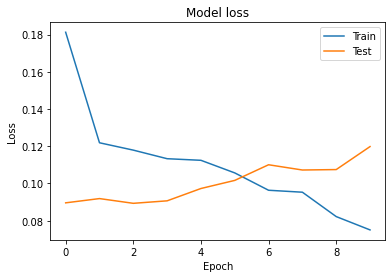

In [ ]:
#Visualising the loss of the model, throughout the training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

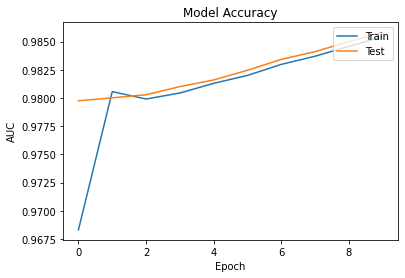

In [ ]:
#Visualising the loss of the model, throughout the training process
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Accuracy')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
